###Manasi Deshmukh 
####Implementing Decision Trees for finding the predictions for survivals in Titanic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline

In [3]:
titanic = pd.read_csv('/content/train.csv')

In [4]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


####We could clearly understand we can remove passengerid, ticket from dataset

In [5]:
titanic = titanic.drop(['PassengerId','Ticket'], axis =1)


In [6]:
titanic.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


In [7]:
titanic = titanic.drop(['Name'], axis =1)

In [8]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [9]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


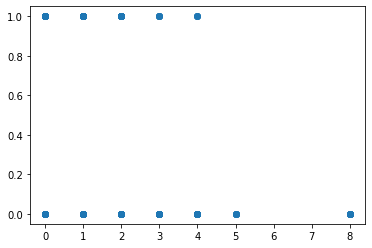

In [10]:
plt.scatter(titanic.SibSp,titanic.Survived)

####We can see that SibSp has outliers more than 5

In [11]:
titanic = titanic[titanic.SibSp<= 5]

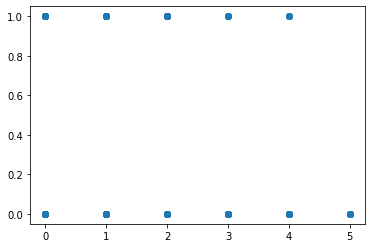

In [12]:
plt.scatter(titanic.SibSp,titanic.Survived)

In [13]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         170
SibSp         0
Parch         0
Fare          0
Cabin       680
Embarked      2
dtype: int64

In [14]:
titanic= titanic.drop(['Cabin'], axis = 1)

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
data = titanic

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

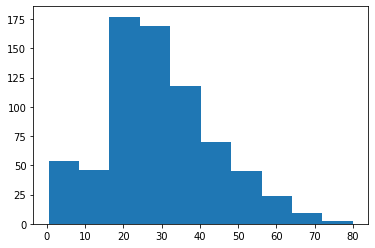

In [17]:
plt.hist(titanic.Age)

In [18]:
data =data.fillna(data.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


####Filling missing data with mean


In [19]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
data = data.dropna()

In [21]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  882 non-null    int64  
 1   Pclass    882 non-null    int64  
 2   Sex       882 non-null    object 
 3   Age       882 non-null    float64
 4   SibSp     882 non-null    int64  
 5   Parch     882 non-null    int64  
 6   Fare      882 non-null    float64
 7   Embarked  882 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.0+ KB


In [23]:
data.Embarked.value_counts()

S    637
C    168
Q     77
Name: Embarked, dtype: int64

###Changing dto numerical for prediction

In [24]:
adults = {'male':1,'female':0}
ad = data.Sex.map(adults)
data['Sex'] = ad

In [25]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [26]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()

In [27]:
data['Embarked'] = model.fit_transform(data['Embarked'])

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


####Dividing the data into training and test

In [29]:
from sklearn.model_selection import train_test_split
data_train,data_test= train_test_split(data,test_size = 0.25,random_state=42)

In [30]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
601,0,3,1,29.699118,0,0,7.8958,2
521,0,3,1,22.000000,0,0,7.8958,2
452,0,1,1,30.000000,0,0,27.7500,0
819,0,3,1,10.000000,3,2,27.9000,2
772,0,2,0,57.000000,0,0,10.5000,2


In [31]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
44,1,3,0,19.000000,0,0,7.8792,1
339,0,1,1,45.000000,0,0,35.5000,2
87,0,3,1,29.699118,0,0,8.0500,2
458,1,2,0,50.000000,0,0,10.5000,2
469,1,3,0,0.750000,2,1,19.2583,0


#####Creating dependent and independent variable


In [32]:
training_pred = data_train.drop(['Survived'], axis =1 )
training_target = data_train['Survived']
testing_pred = data_test.drop(['Survived'], axis =1 )
testing_target = data_test['Survived']

In [33]:
training_pred

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
601,3,1,29.699118,0,0,7.8958,2
521,3,1,22.000000,0,0,7.8958,2
452,1,1,30.000000,0,0,27.7500,0
819,3,1,10.000000,3,2,27.9000,2
772,2,0,57.000000,0,0,10.5000,2
...,...,...,...,...,...,...,...
107,3,1,29.699118,0,0,7.7750,2
274,3,0,29.699118,0,0,7.7500,1
869,3,1,4.000000,1,1,11.1333,2
440,2,0,45.000000,1,1,26.2500,2


####Importing decision tree

In [34]:
from sklearn import tree

In [35]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth= 9)

In [36]:
model.fit(training_pred,training_target)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [37]:
model.score(training_pred,training_target)

0.9046898638426626

[Text(0.43579545454545454, 0.95, 'X[1] <= 0.5\nentropy = 0.956\nsamples = 661\nvalue = [412, 249]'),
 Text(0.20227272727272727, 0.85, 'X[0] <= 2.5\nentropy = 0.819\nsamples = 216\nvalue = [55, 161]'),
 Text(0.05454545454545454, 0.75, 'X[2] <= 2.5\nentropy = 0.327\nsamples = 117\nvalue = [7, 110]'),
 Text(0.03636363636363636, 0.65, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07272727272727272, 0.65, 'X[2] <= 24.5\nentropy = 0.294\nsamples = 116\nvalue = [6, 110]'),
 Text(0.05454545454545454, 0.55, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.09090909090909091, 0.55, 'X[2] <= 27.5\nentropy = 0.388\nsamples = 79\nvalue = [6, 73]'),
 Text(0.03636363636363636, 0.45, 'X[5] <= 17.429\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.01818181818181818, 0.35, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05454545454545454, 0.35, 'X[5] <= 28.0\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.03636363636363636, 0.25, 'entropy = 0.0\nsamples = 2\nvalu

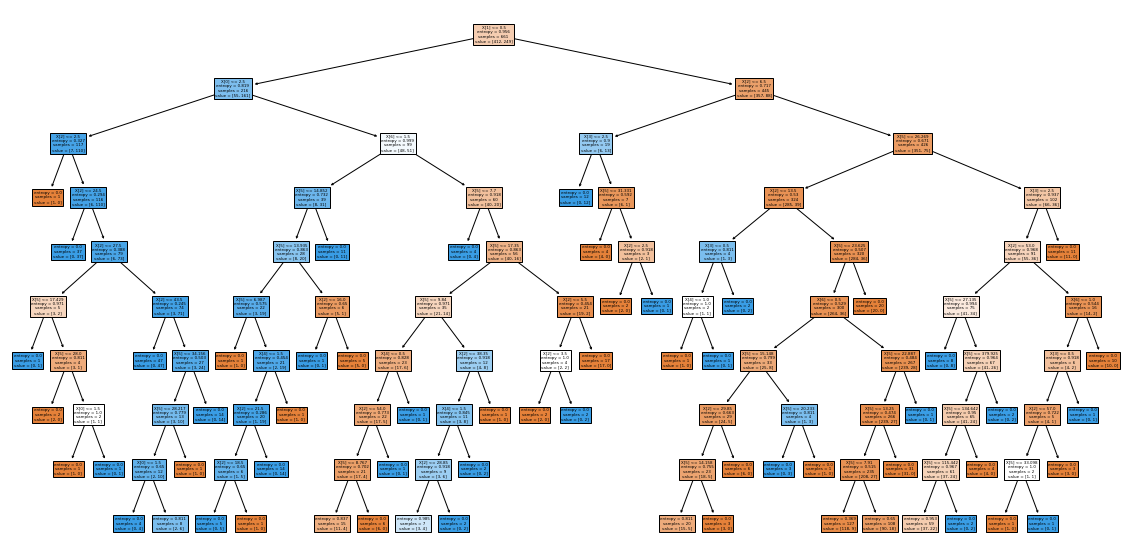

In [38]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,filled=True)

In [39]:
label_test = model.predict(testing_pred)

In [40]:
from ssl import ALERT_DESCRIPTION_BAD_RECORD_MAC
from sklearn.metrics import accuracy_score
acc = accuracy_score(label_test,testing_target)

In [41]:
acc

0.8099547511312217

####We are achieving the accuracy of 81% which is pretty good according to the data